## **DETECTING ANAMOLIES IN FINANCIAL TRANSACTION**

Developing a machine learning model to detect fraudulent financial transactions.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading**

The dataset, containing credit card transaction data, is loaded from a CSV file. This dataset will be used for training the machine learning model.


In [ ]:
# Load data
data = pd.read_csv('/content/creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


**Split features and target**

The features (independent variables) and the target variable (the variable to be predicted) are separated from the dataset. This separation allows us to train the model using the features and evaluate its performance based on its predictions of the target variable

In [ ]:
# Split features and target
X = data.drop(columns=['Class'])
y = data['Class']

**Train-test split**

The dataset is split into two sets: a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. This ensures that the model's performance is assessed on data it hasn't seen during training, helping to avoid overfitting.

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardize features**

The features are standardized to have a mean of 0 and a standard deviation of 1. Standardization is important for many machine learning algorithms, particularly those that rely on distance metrics, as it ensures that all features contribute equally to the model's predictions.

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Exploratory Data Analysis (EDA)**

EDA involves analyzing and visualizing the data to gain insights and identify patterns that may be useful for modeling. This may include plotting histograms, scatter plots, heatmaps or correlation matrices. EDA helps to understand the structure of the data and guide preprocessing and modeling decisions.

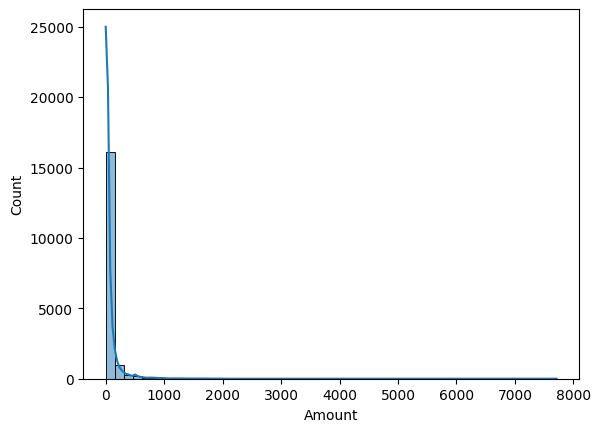

In [ ]:
# Exploratory Data Analysis (EDA)
# Visualize data distribution
sns.histplot(data['Amount'], bins=50, kde=True)
plt.show()

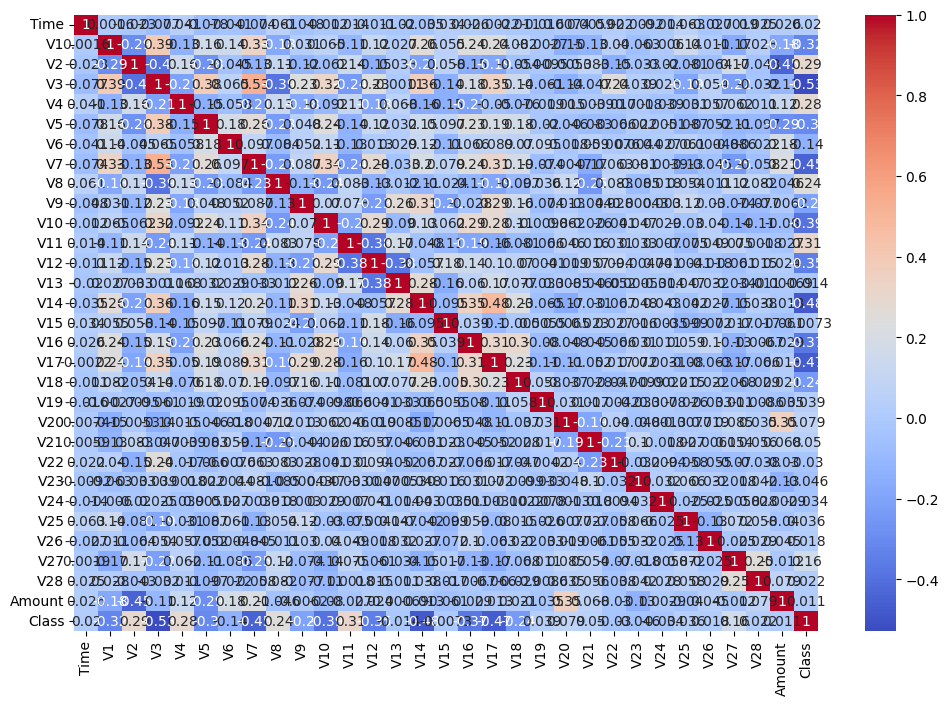

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

**Model training with Random Forest**

A machine learning model is trained using the training data. In this case, a Random Forest classifier is used. Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

In [ ]:
# Model training with Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

**Model evaluation**

The performance of the trained model is evaluated using metrics such as accuracy, precision, recall, and AUC-ROC score. These metrics provide insights into how well the model is performing and help identify areas for improvement

In [ ]:
# Model evaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3555
         1.0       0.89      0.89      0.89        18

    accuracy                           1.00      3573
   macro avg       0.94      0.94      0.94      3573
weighted avg       1.00      1.00      1.00      3573

AUC-ROC: 0.9441631504922644


**Save the model and scaler**

Once the model is trained and evaluated, it is saved to disk along with the scaler. Saving the model allows it to be reused later without having to retrain it from scratch.

In [ ]:
# Save the model and scaler
joblib.dump(model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Function to load the model and scaler and make predictions**


*   A function is defined to load the saved model and scaler, preprocess new data, and make predictions using the loaded model. This function encapsulates the prediction process and can be easily reused for making predictions on new data.
*   An example scenario is provided where new transaction data is preprocessed and used to make predictions using the previously trained model. This demonstrates how to use the prediction function in practice



In [ ]:
# Function to load the model and scaler and make predictions
def predict_new_data(new_data):
    # Load model and scaler
    model = joblib.load('fraud_detection_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Preprocess new data
    new_data_scaled = scaler.transform(new_data)

    # Make predictions
    predictions = model.predict(new_data_scaled)
    return predictions

# Example usage
if __name__ == "__main__":
    # Example new transaction data (use real new data here)
    new_transactions = pd.DataFrame([
        {
            "Time": 172792,
            "V1": -1.3598071336738,
            "V2": -0.0727811733098497,
            "V3": 2.53634673796914,
            "V4": 1.37815522427443,
            "V5": -0.338320769942518,
            "V6": 0.462387777762292,
            "V7": 0.239598554061257,
            "V8": 0.0986979012610507,
            "V9": 0.363786969611213,
            "V10": 0.0907941719789316,
            "V11": -0.551599533260813,
            "V12": -0.617800855762348,
            "V13": -0.991389847235408,
            "V14": -0.311169353699879,
            "V15": 1.46817697209427,
            "V16": -0.470400525259478,
            "V17": 0.207971241929242,
            "V18": 0.0257905801985591,
            "V19": 0.403992960255733,
            "V20": 0.251412098239705,
            "V21": -0.018306777944153,
            "V22": 0.277837575558899,
            "V23": -0.110473910188767,
            "V24": 0.0669280749146731,
            "V25": 0.128539358273528,
            "V26": -0.189114843888824,
            "V27": 0.133558376740387,
            "V28": -0.0210530534538215,
            "Amount": 149.62
        }
    ])

    # Preprocess new data and make predictions
    new_transactions_scaled = scaler.transform(new_transactions)
    predictions = predict_new_data(new_transactions_scaled)
    print(predictions)


[0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**In summary, the outputs 0 and 1 represent the model's predictions regarding whether a given transaction is fraudulent or non-fraudulent, based on the patterns and relationships learned during training. Output 0 signifies a non-fraudulent transaction, while output 1 signifies a fraudulent transaction.**